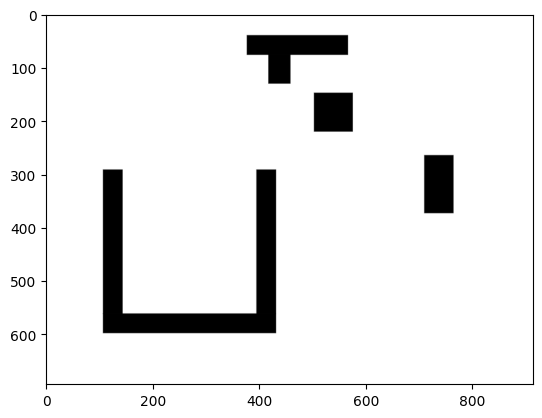

In [1]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./generated_images/u_shape.png"))

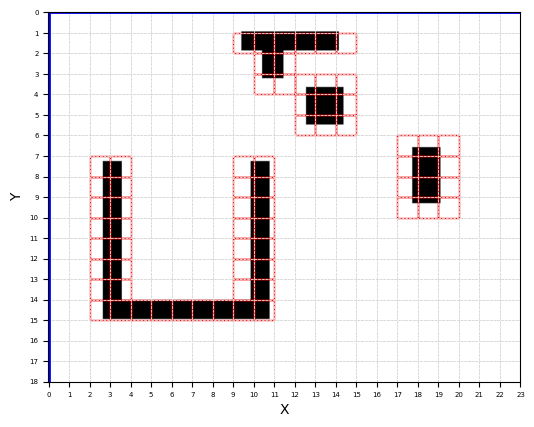

In [2]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./generated_images/u_shape.png", grid_size=40)
map.draw_coordinate_system()

In [3]:
initial=(0,0)
goal=(22,17)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 112
Elapsed Time: 0.0053479671478271484 seconds
path length = 23


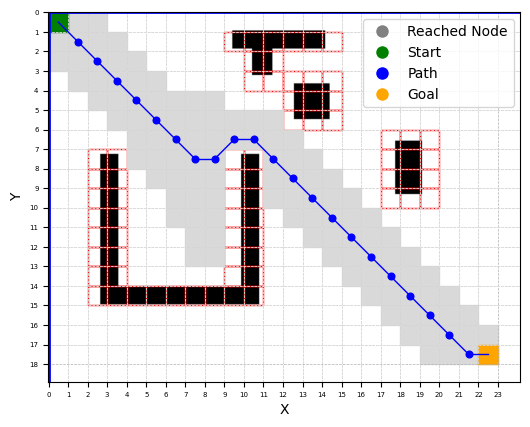

In [4]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.00458979606628418 seconds
path length = 23


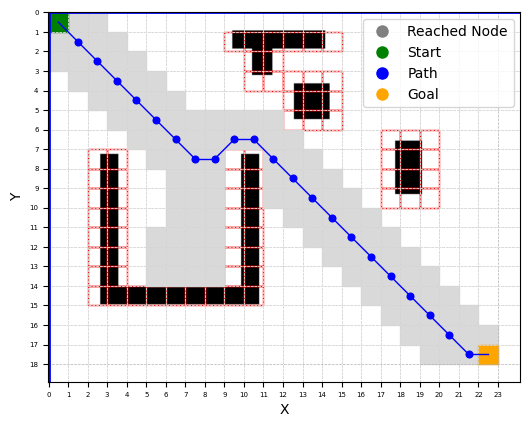

In [5]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [6]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

In [7]:
simplified_path

[(0, 0), array([10,  6]), array([10,  6]), array([21, 17]), array([22, 17])]

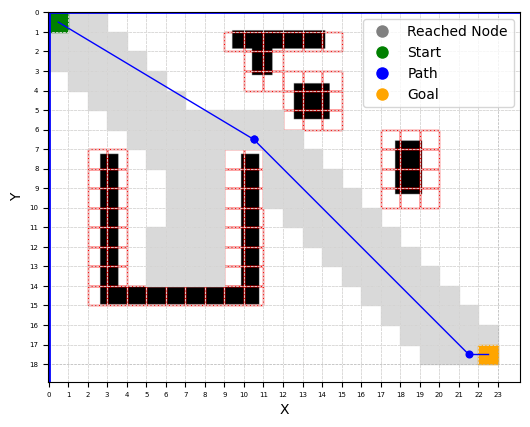

In [8]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  63
------------Generation 1 -----------------
Population size:  63
Mean fit_value:  -165749.67352702658
Mean path_value:  28.555104922757916
Mean smooth_value:  1651.7857142857142
Best path:  [0, 99, 149, 269, 413]
------------Generation 2 -----------------
Population size:  56
Mean fit_value:  -159566.66420715433
Mean path_value:  28.333210357717135
Mean smooth_value:  1590.0
Best path:  [0, 99, 149, 269, 413]
Path grid numbers:  [0, 99, 149, 269, 413]
Path grid coordinates:  [(0, 0), (7, 4), (11, 6), (16, 11), (22, 17)]


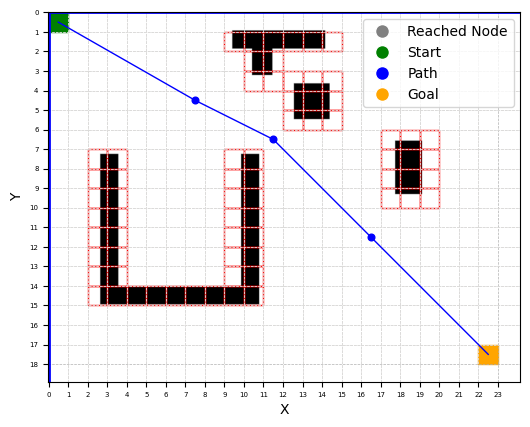

In [11]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=2, initial_population_size=1, 
                p_crossover=1, p_mutation=0.05, verbose=False)

map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])